<a href="https://colab.research.google.com/github/06bhavi/VOIS_AICTE_Oct2025_Bhavini-Ajmera/blob/main/Bhavini_ajmera_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [5]:
#read data
df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv',low_memory=False)


In [6]:
df.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5226 entries, 0 to 5225
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5226 non-null   int64  
 1   NAME                            5168 non-null   object 
 2   host id                         5226 non-null   int64  
 3   host_identity_verified          5153 non-null   object 
 4   host name                       5206 non-null   object 
 5   neighbourhood group             5199 non-null   object 
 6   neighbourhood                   5210 non-null   object 
 7   lat                             5218 non-null   float64
 8   long                            5218 non-null   float64
 9   country                         5176 non-null   object 
 10  country code                    5147 non-null   object 
 11  instant_bookable                5147 non-null   object 
 12  cancellation_policy             51

In [8]:
df.duplicated().value_counts()

,count
False,5226


In [9]:
#Neighbourhood group was "brookln" instead of "Brooklyn"
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


Problems Identified within the Data

-541 duplicated Records where found in the Data.

-Insufficient information were recorded for the house_rules and Licence columns.

-Dollar signs and commas recorded along with the values for price and service fee.

-The currency for price and service fee were not added to the column's titles.

-Missing values in some records

-Columns like the price, service fee, id, host id, last review, Construction    year are assigned wrong datatypes

-In the neighbourhood group column the spelling of 'Brooklyn' was misspelt in some records.

-Some outliers were identified in the availability 365 column.

CLEAN THE DATA

-Steps to be Taken for Data Cleaning

-Drop duplicated records.

-Drop house rules and license columns with insufficient data.

-Remove all dollar signs in the price and service fee columns.

-Remove all commas from the price and service fee columns.

-Rename the price and service fee columns to include a dollar signs.

-Drop all records with missing values

-Change all mismatched data types to the appropriate once
-Correct the Spelling of 'brookin' to 'Brooklyn'

-Get rid of outliers in the 'availability 365' column data

In [10]:
#drop duplicate records
df.drop_duplicates(inplace = True)
#drop house_rules and license columns with insufficient data

df.drop(columns=['house_rules', 'license'], inplace=True)



In [11]:
#Remove all dollar signs in the price and service fee columns

df['price'] = df['price'].str.replace('$','', regex = False)

df['service fee'] = df['service fee'].str.replace('$','', regex= False)

#Remove all commas in the price and service fee columns

df['price'] = df['price'].str.replace(',','', regex= False)

df['service fee'] = df['service fee'].str.replace(',','', regex= False)

#Rename the price and service fee columns to include a dollar sign

df.rename(columns = { 'price': 'price_$','service fee': 'service_fee_$'}, inplace =True)

#Drop all records with missing values

df.dropna(inplace = True)

#Change all mismatched data types to the appropriate once.

df [ 'price_$']= df['price_$'].astype(float)

df['service_fee_$'] = df['service_fee_$'].astype(float)

df['id'] = df['id'].astype(str)

df['host id'] = df['host id'].astype(str)

df['last review']=  pd.to_datetime(df['last review'])

df['Construction year'] = df['Construction year'].astype(int)
# correct the spelling of 'brookln' to 'Brooklyn'
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] ='Brooklyn'

#get rid of outliers in the 'availability 365' column data
df = df.drop(df[df['availability 365']>500].index)


In [12]:
df.duplicated().value_counts()

,count
False,4237


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4237 entries, 0 to 5224
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              4237 non-null   object        
 1   NAME                            4237 non-null   object        
 2   host id                         4237 non-null   object        
 3   host_identity_verified          4237 non-null   object        
 4   host name                       4237 non-null   object        
 5   neighbourhood group             4237 non-null   object        
 6   neighbourhood                   4237 non-null   object        
 7   lat                             4237 non-null   float64       
 8   long                            4237 non-null   float64       
 9   country                         4237 non-null   object        
 10  country code                    4237 non-null   object        
 11  instant_b

In [14]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237,4237.000000,4237.000000,4237.000000,4237.000000
mean,40.728440,-73.960240,2012.358036,617.881992,123.576823,9.014397,58.915978,2018-05-22 04:41:44.791125504,0.890387,2.999292,2.581780,207.310361
min,40.508680,-74.239860,2003.000000,50.000000,10.000000,-12.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.688250,-73.984210,2007.000000,324.000000,65.000000,2.000000,8.000000,2017-08-19 00:00:00,0.140000,2.000000,1.000000,97.000000
50%,40.722120,-73.959700,2012.000000,619.000000,124.000000,3.000000,26.000000,2019-04-21 00:00:00,0.440000,3.000000,1.000000,208.000000
75%,40.762930,-73.944260,2017.000000,912.000000,182.000000,5.000000,80.000000,2019-06-19 00:00:00,1.250000,4.000000,2.000000,316.000000
max,40.908040,-73.739550,2022.000000,1200.000000,240.000000,452.000000,607.000000,2022-05-21 00:00:00,10.000000,5.000000,96.000000,426.000000
std,0.051858,0.035405,5.751049,336.523910,67.313324,26.305400,75.490374,NaN,1.096496,1.426595,6.619122,125.458330


What are different property types in the Dataset?


In [15]:
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,2565
Private room,1619
Shared room,53


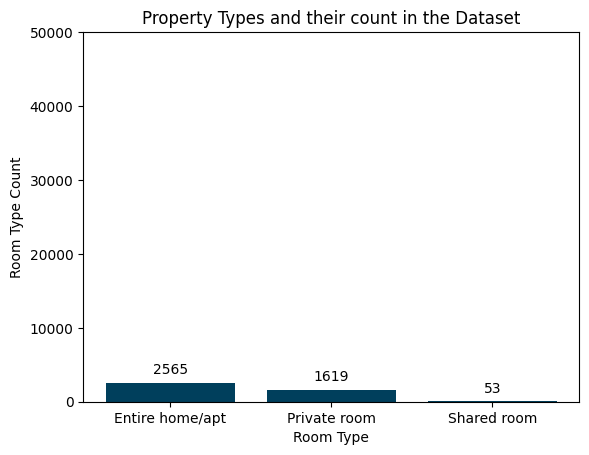

In [16]:
#Room type count plotted on a barchart

room_type_bar = plt.bar(property_types.index, property_types.loc[:, "count"], color='#003f5c');

plt.bar_label(room_type_bar, labels = property_types.loc[:, "count"], padding = 4);

plt.ylim([0,50000]);

plt.xlabel('Room Type');

plt.ylabel('Room Type Count');

plt.title('Property Types and their count in the Dataset');

The Airbnb open dataset reveals four distinct property or room types. These categories comprise;

Entire home/apt

Private room

Shared room

Hotel room

Notably, the barchart illustrates that Entire home/apt dominates the dataset with 44,163 occurrences, followed by Private room with 37,494 occurrences. Shared room and Hotel room trail behind with 1,646 and 108 occurrences, respectively.

Which neighbourhood group has the highest number of listings?

In [17]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,1944
Brooklyn,1919
Queens,294
Bronx,57
Staten Island,23


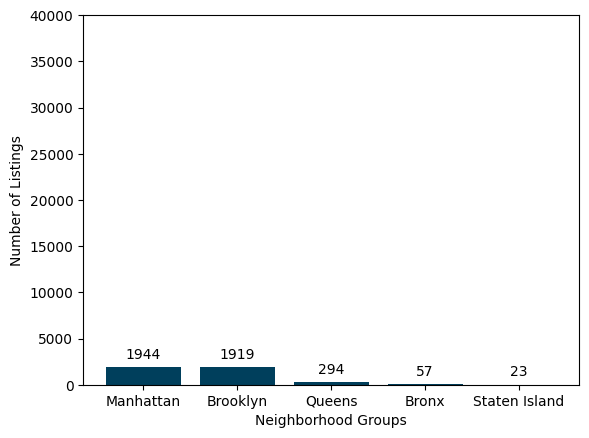

In [18]:
#which neighborhood group has the highest number of listings?

hood_group_bar= plt.bar(hood_group.index, hood_group.loc[:, "count"],color='#003f5c');

plt.bar_label(hood_group_bar, labels = hood_group.loc[:, "count"], padding=4);

plt.ylim([0,40000]);

plt.xlabel('Neighborhood Groups');

plt.ylabel('Number of Listings');

Which neighborhoods group have the highest average prices for Airbnb listings?


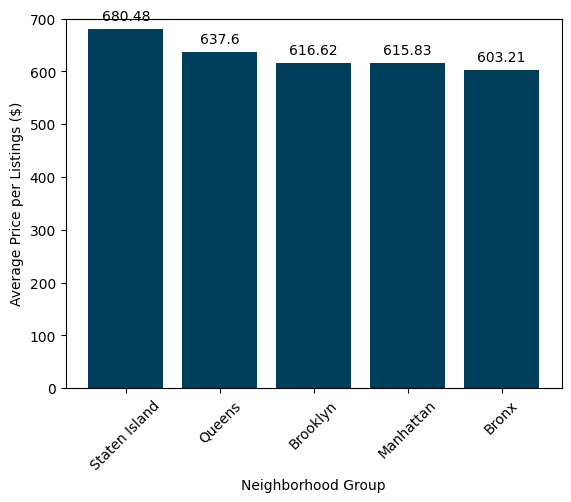

In [19]:

#which neighborhoods group have the highest average prices for Airbnb listings?

avg_price = df.groupby('neighbourhood group') ['price_$'].mean().sort_values(ascending= False).to_frame()

avg_price_bar= plt.bar(avg_price.index, avg_price.loc[:, 'price_$'],color='#003f5c');

plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:, "price_$"], 2), label_type = 'edge', padding=4);

plt.ylim([0,700]);

plt.xlabel('Neighborhood Group');

plt.ylabel('Average Price per Listings ($)');

plt.xticks(rotation = 45);

Is there a relationship between the construction year of property and price?




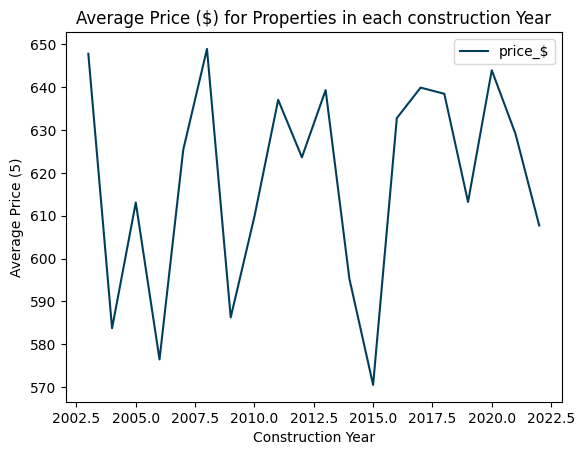

In [20]:



#is there a relationship between the construction year of property and price?

df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot(color='#003f5c');

plt.xlabel('Construction Year');

plt.ylabel('Average Price (5)');

plt.title('Average Price ($) for Properties in each construction Year');

**Who are the top 10 hosts by calculated host listing count?**


From the numerous hosts in the dataset, we will see the 10 hosts with the highest calculated host count


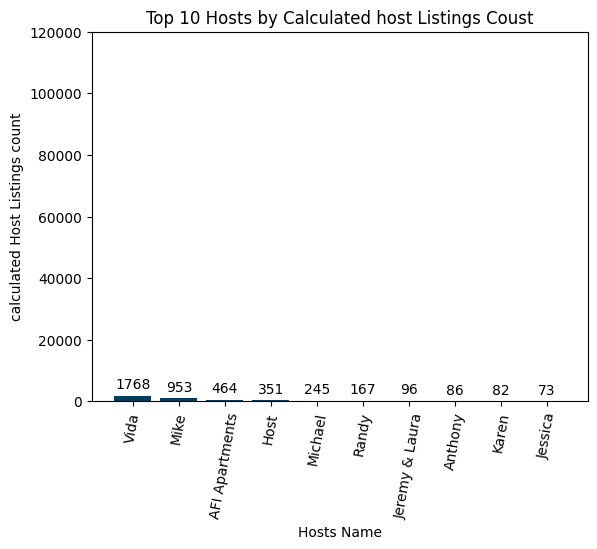

In [21]:
#who are the top 10 hosts by calculated host listing count?

hosts= df.groupby('host name')[ 'calculated host listings count'].sum().sort_values(ascending= False).nlargest (10). to_frame()


hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count' ],color='#003f5c');

plt.bar_label(hosts_bar, label = hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding=3);

plt.xlabel('Hosts Name');

plt.ylabel('calculated Host Listings count');

plt.xticks(rotation =80);

plt.ylim([0, 120000]);

plt.title('Top 10 Hosts by Calculated host Listings Coust');

The bar chart above illustrates the top 10 hosts based on the calculated listing count, with Sonder (NYC) notably leading with 111,921 listings Subsequently, the other hosts follow in descending order.

Karen at second postion with 42410 hosts

Jeniffer at third position with 31447 hosts

Blueground at fourth position with 21168 hosts

Kaz at fifth position with 17552 hosts

Corporate Housing at sixth position with 14833 hosts

Soya at seventh positon with 10260 hosts

Stay with vibe at eight position with 10260 hosts

Kara at ninth position with 10092 hosts

and finally Jeremy and Laura at tenth position 10080 hosts



**Are hosts with verified identities more likely to receive positive reviews?**

In [22]:
#Are hosts with verified identities more likely to receive positive reviews?

review =df.groupby('host_identity_verified') ['review rate number'].mean().sort_values(ascending= False).to_frame()

review

,review rate number
host_identity_verified,
unconfirmed,3.033703
verified,2.963303


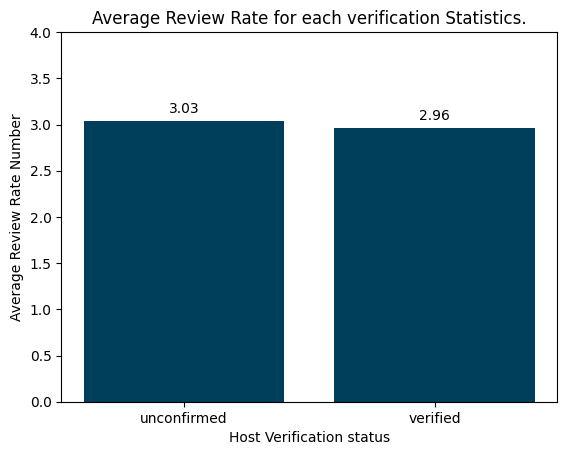

In [23]:
review_bar = plt.bar(review.index, review.loc[:, "review rate number"], color='#003f5c');

plt.bar_label(review_bar, labels= round(review.loc[:, "review rate number"], 2), padding = 4);

plt.ylim([0,4]);

plt.xlabel('Host Verification status');

plt.ylabel('Average Review Rate Number');

plt.title('Average Review Rate for each verification Statistics.');

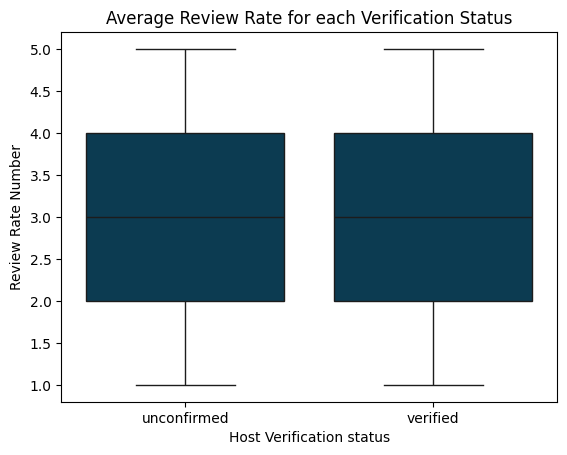

In [24]:
base_color =sns.color_palette()[0]

sns.boxplot(data= df, x ="host_identity_verified", y= "review rate number", color= '#003f5c');

plt.xlabel('Host Verification status');

plt.ylabel('Review Rate Number');

plt.title('Average Review Rate for each Verification Status');

The average review rates for verified and unconfirmed hosts are 3.27 and 3.28, respectively, indicating a marginal difference in their review rates, with unconfirmed hosts having a slightly higher rate. This suggests that verified hosts are not necessarily more likely to receive positive reviews compared to unconfirmed hosts.







**Is there a correlation between the price of a listing and its service fee?**

In [25]:
#Is there a correlation between the price of a listing and its service fee?
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999912968044715)

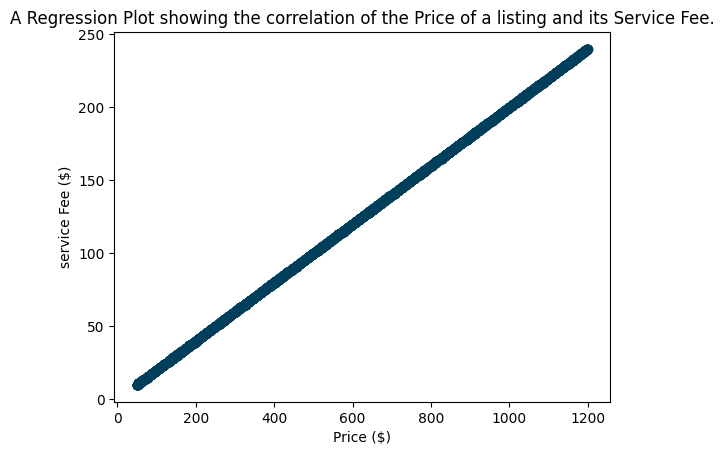

In [26]:
sns.regplot (df, x ='price_$', y= 'service_fee_$', color='#003f5c');

plt.xlabel('Price ($)');

plt.ylabel('service Fee ($)');

plt.title('A Regression Plot showing the correlation of the Price of a listing and its Service Fee.');



The Pearson correlation coefficient between the price and service fee is 0.99, indicating a highly robust positive correlation between these variables. On the regression plot, each point forms a rising diagonal line towards the right, signifying that as the price of a property increases, so does its service fee.


**What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?**


In [27]:
#is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and renow df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to frame()

ARRN =df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            2.941176
                    Private room               3.000000
                    Shared room                1.000000
Brooklyn            Entire home/apt            2.943782
                    Private room               3.088033
                    Shared room                2.555556
Manhattan           Entire home/apt            3.020178
                    Private room               3.039823
                    Shared room                2.851852
Queens              Entire home/apt            2.801587
                    Private room               2.981481
                    Shared room                3.333333
Staten Island       Entire home/apt            2.777778
                    Private room               2.428571

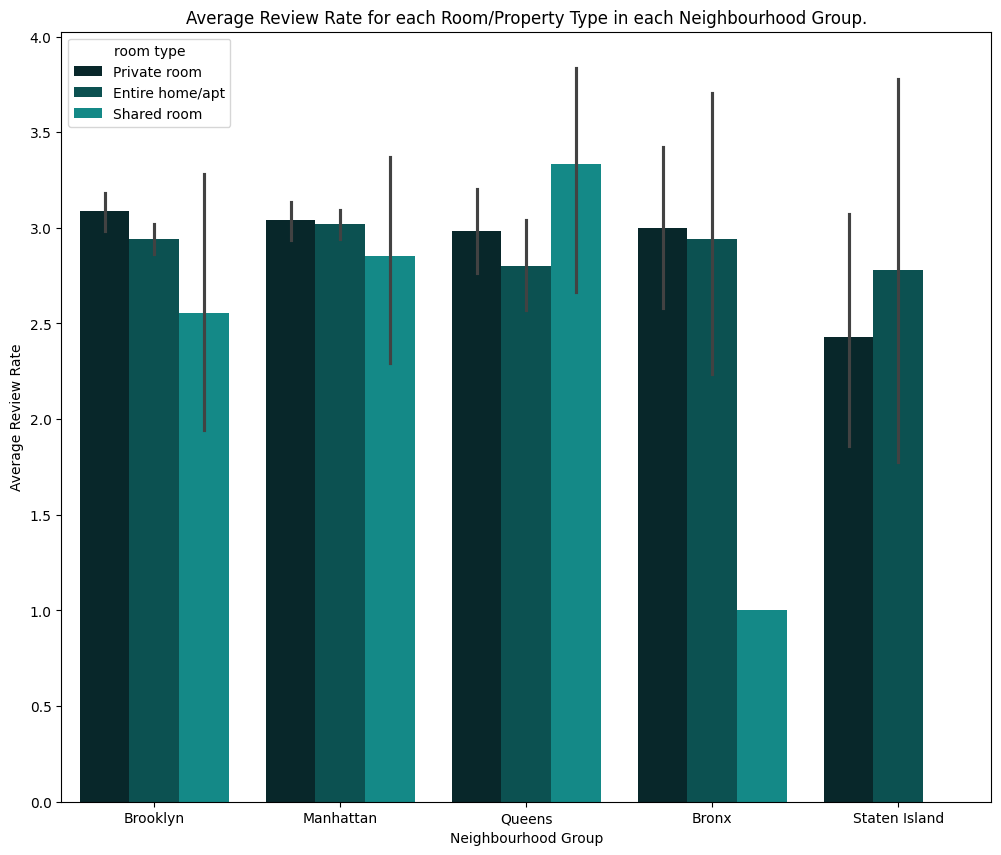

In [45]:
custom_palette = ['#022b30', '#005d5d', '#009d9a']
plt.figure(figsize =[12,10]);

sns.barplot(data= df, x ='neighbourhood group', y= 'review rate number', hue= 'room type',palette=custom_palette);

plt.xlabel('Neighbourhood Group');

plt.ylabel('Average Review Rate');

plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');

Hotel rooms exhibit has higher review rate compared to all other property types within the three neighborhood groups where they are located Brooklyn, Manhattan, and Queens



**Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?**

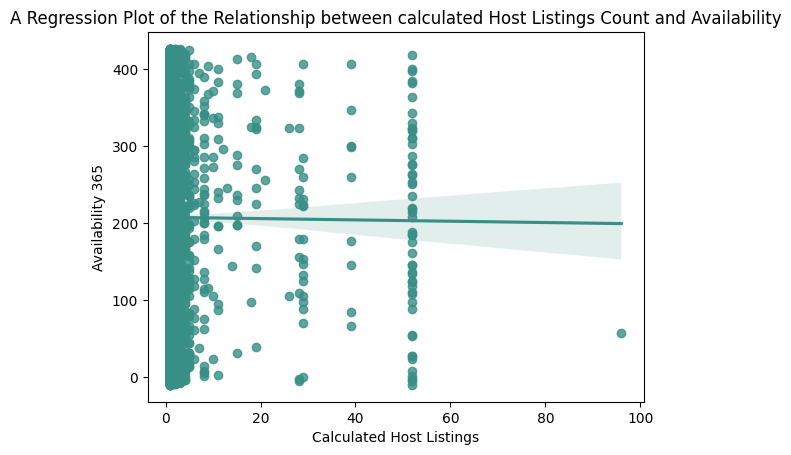

In [29]:
#are hosts with a higher calculated bost listings count more likely to maintain higher availability throughout the year?

sns.regplot(df, x ='calculated host listings count', y ='availability 365',color='#378f86');

plt.xlabel('Calculated Host Listings');

plt.ylabel('Availability 365');

plt.title('A Regression Plot of the Relationship between calculated Host Listings Count and Availability');

In [30]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(-0.00448905478776541)

The Pearson correlation coefficient for the association between calculated host listings and availability 365 is 0.136, indicating a weak positive correlation between the two variables.



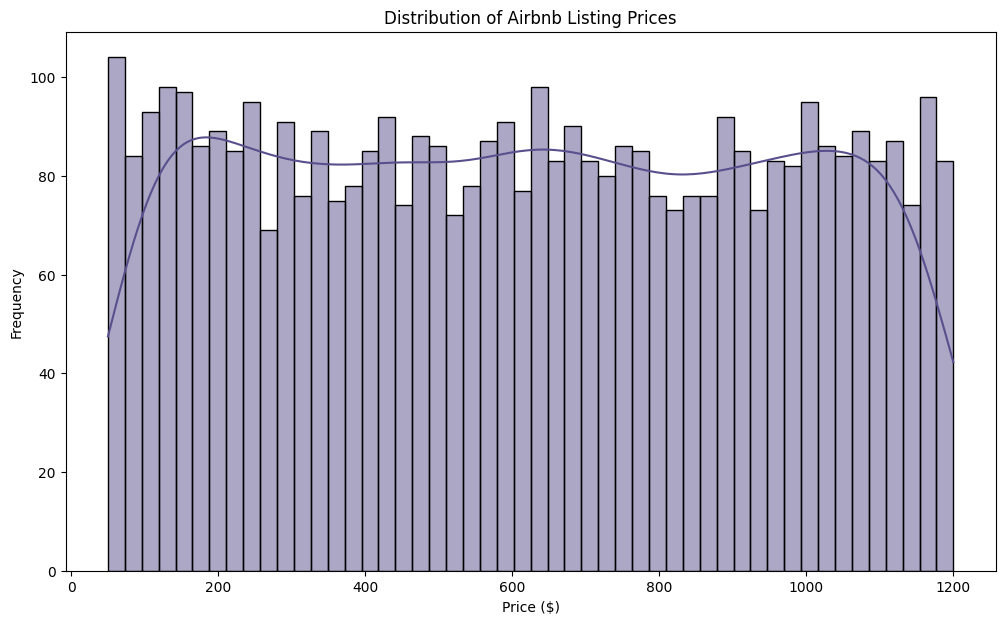

In [32]:
Price Distribution
plt.figure(figsize=(12, 7))
# We filter out extreme prices for a more readable plot
sns.histplot(df[df['price_$'] < 1500]['price_$'], bins=50, kde=True, color='#58508d')
plt.title('Distribution of Airbnb Listing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.savefig('price_distribution_histogram.png')
plt.show()

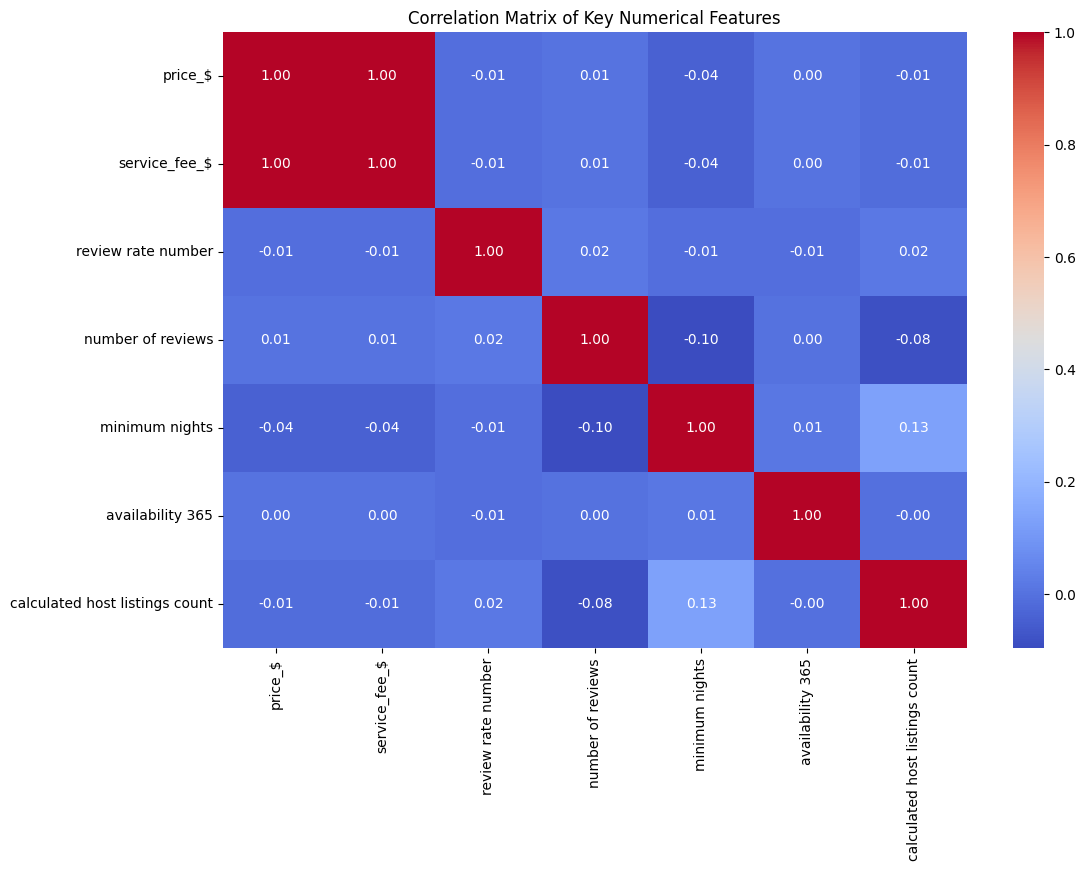

In [33]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_cols = ['price_$', 'service_fee_$', 'review rate number', 'number of reviews', 'minimum nights', 'availability 365', 'calculated host listings count']
corr = df[corr_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Numerical Features')
plt.savefig('correlation_heatmap.png')
plt.show()

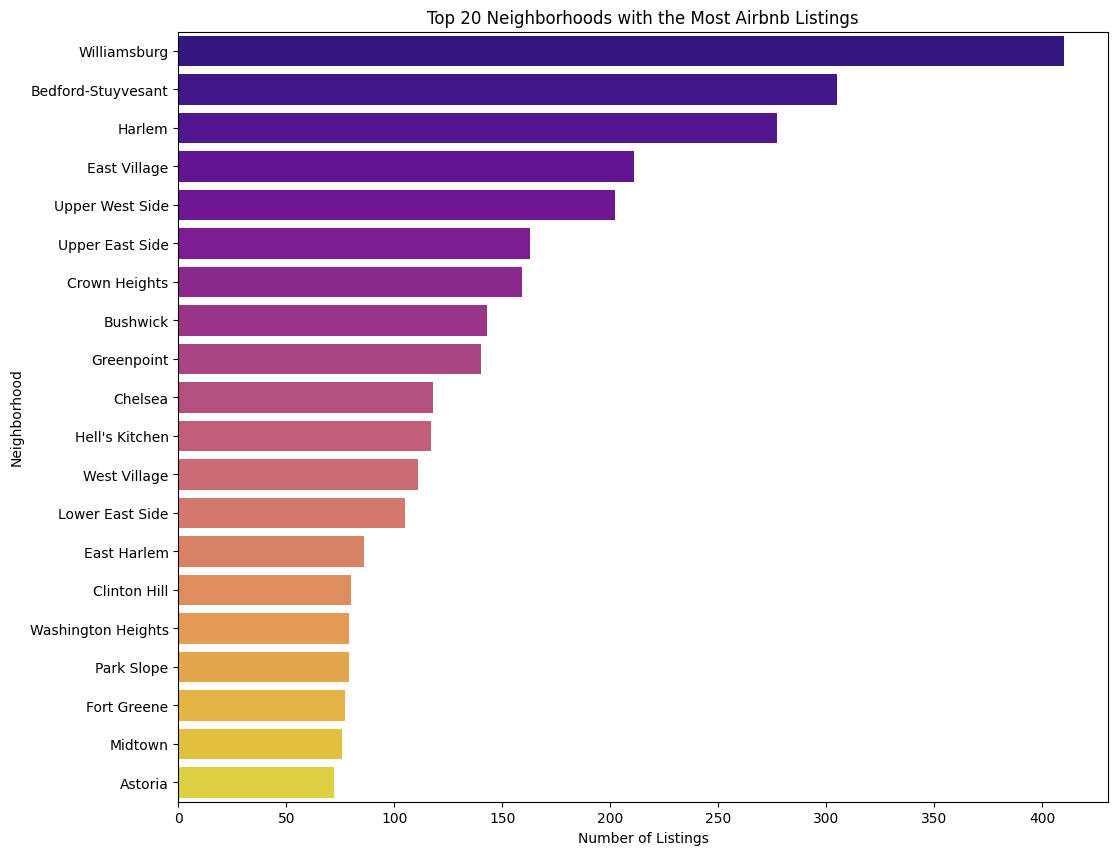

In [36]:
#Top 20 Neighborhoods by Listing Count
plt.figure(figsize=(12, 10))
top_neighborhoods = df['neighbourhood'].value_counts().nlargest(20)

sns.barplot(
    y=top_neighborhoods.index,
    x=top_neighborhoods.values,
    palette='plasma',
    hue=top_neighborhoods.index, # Assign y-axis variable to hue
    legend=False # Disable the legend
)

plt.title('Top 20 Neighborhoods with the Most Airbnb Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show()


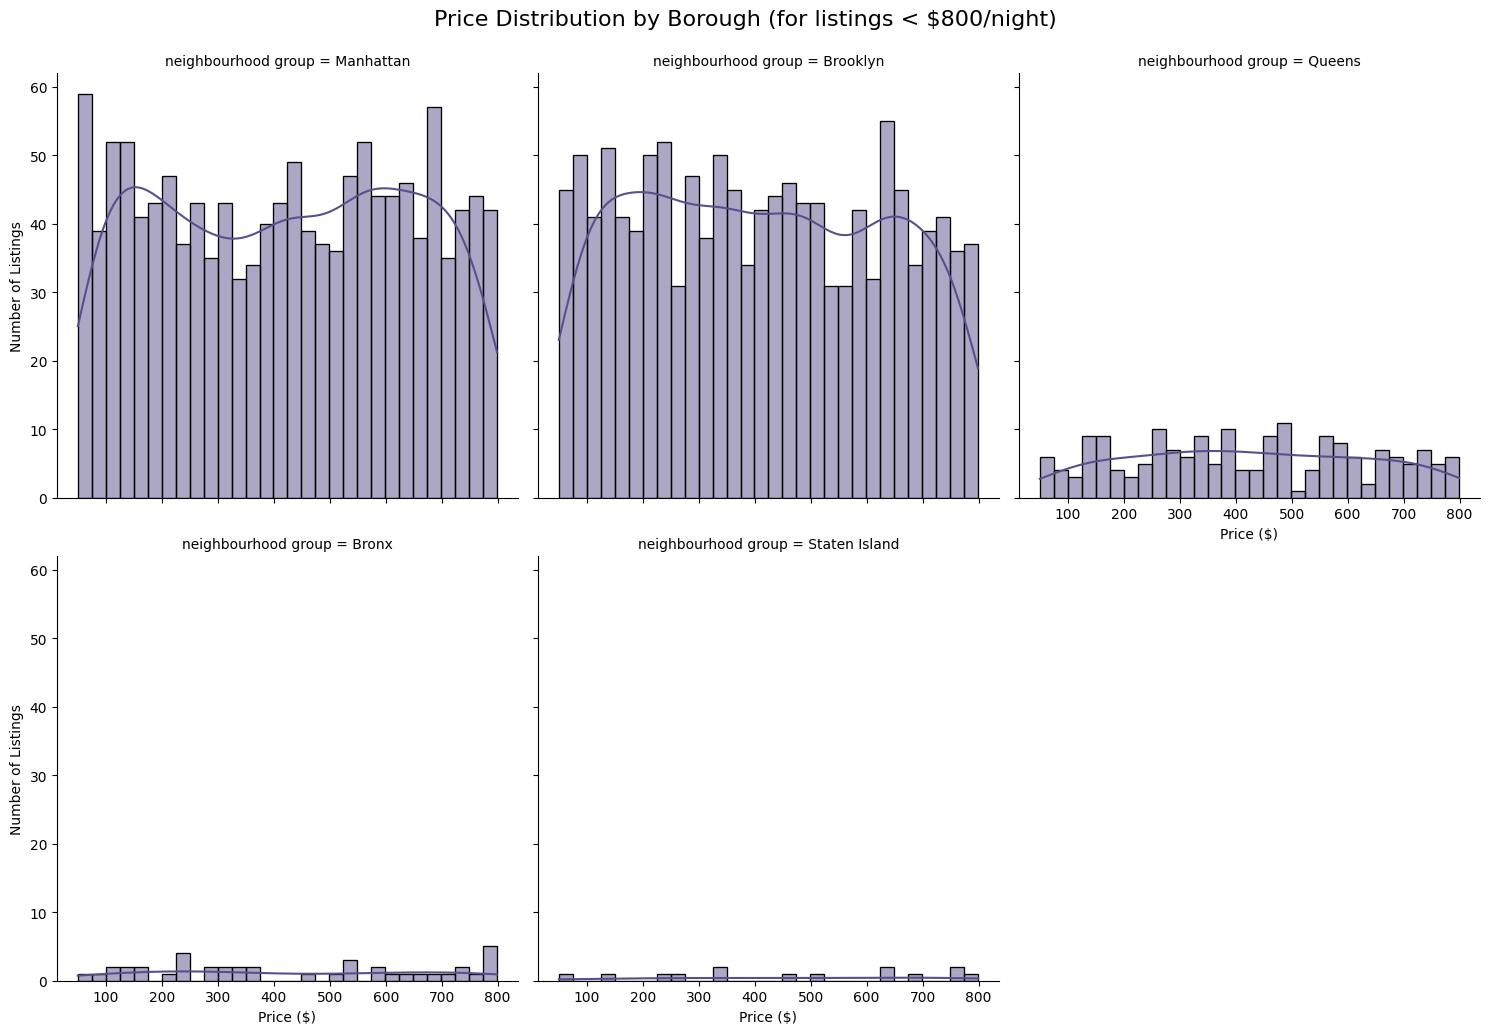

In [42]:
 #Price Distribution by Borough
price_filtered_df = df[df['price_$'] < 800]
g = sns.displot(
    data=price_filtered_df,
    x="price_$",
    col="neighbourhood group",
    col_wrap=3,
    kind="hist",
    bins=30,
    kde=True,
    color='#58508d' # Use 'color' instead of 'palette'
)
g.fig.suptitle('Price Distribution by Borough (for listings < $800/night)', y=1.03, fontsize=16)
g.set_axis_labels("Price ($)", "Number of Listings")
plt.show()

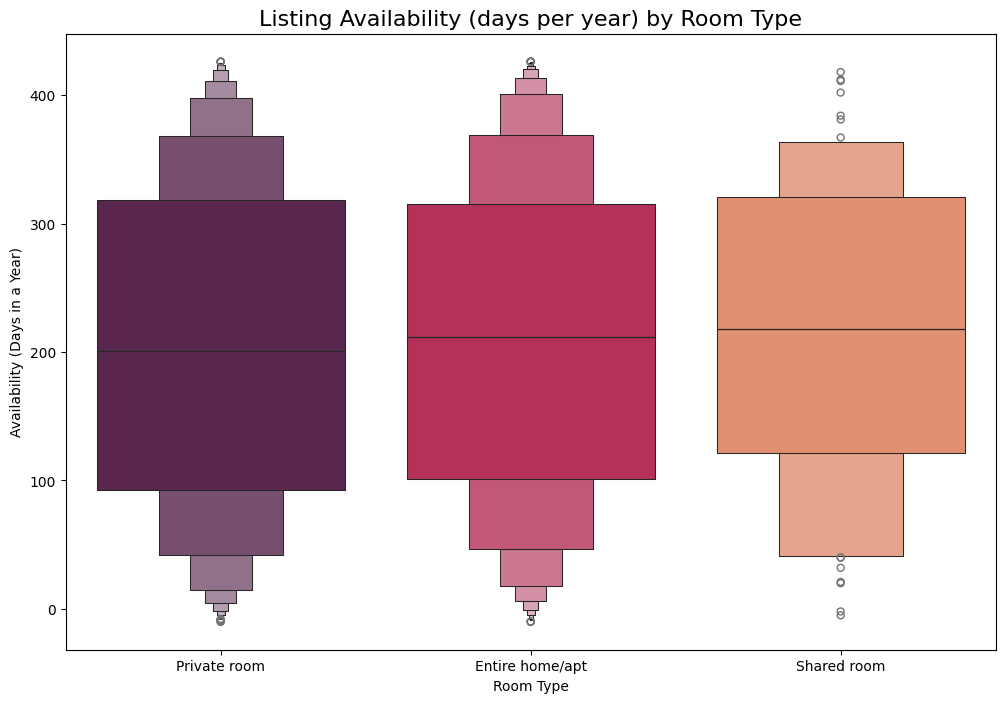

In [43]:
# Listing Availability by Room Type
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df,
    x='room type',
    y='availability 365',
    palette='rocket',
    hue='room type',
    legend=False
)
plt.title('Listing Availability (days per year) by Room Type', fontsize=16)
plt.xlabel('Room Type')
plt.ylabel('Availability (Days in a Year)')
plt.show()


**Conclusion**

In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we've uncovered valuable insights into listing distribution, pricing dynamics, host, and review analysis.

Key findings include the dominance in counts of Entire home/apt listings, the variability in listing counts across neighborhood groups, and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified host status on review rates, as well as the strong correlation between listing price and service fee.

Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for Airbnb Lastly, expanding the analysis to include predictive modeling techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behavior, facilitating strategic decision-making for stakeholders in the short term lodging industry.